# Kiva Repayment Analysis
## by Christopher James

## Preliminary Wrangling

This dataset contains statistics about borrowers from the microfinance charity Kiva. Wrangling was done on the notebook
'kiva_repayment_wrangle.ipynb'. More information can be found in the file 'kiva_repayment_wrangle.ipynb'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Any needed functions


# Function to generate a random sample of df rows.
def df_sample(dataframe, samp_size):
    samples = np.random.choice(dataframe.shape[0], samp_size, replace = False)
    return dataframe.loc[samples,:]

In [3]:
# Read csv file into dataframe. Make copy for analysis.
df_original = pd.read_csv('kiva_loans_master.csv')
df = df_original.copy()

In [4]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,To repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"user_favorite, user_favorite","female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,To purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,"user_favorite, user_favorite",female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,To purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 671203 non-null  object 
 6   country_code        671205 non-null  object 
 7   country             671205 non-null  object 
 8   region              670238 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          671158 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      671205 non-null  object 
 13  funded_time         668863 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

### What is the structure of your dataset?

This dataset consists of 671,205 rows and 20 columns. Those columns are 'id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'partner_id', 'posted_time', 'disbursed_time', 'funded_time', 'term_in_months', 'lender_count', 'tags', 'borrower_genders', 'repayment_interval', and 'date'.

### What is/are the main feature(s) of interest in your dataset?

I am looking to discover what features have an affect on the repayment interval.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe loan amount, sector, country, and length of loan will have affects on repayment interval.

## Univariate Exploration

### Distribution of Repayment Interval

In [6]:
df2 = df.query('repayment_interval == "weekly"')
df2['country'].value_counts()

Kenya    602
Name: country, dtype: int64

In [7]:
df3 = df.query('country == "Kenya"')
df3['repayment_interval'].value_counts()

monthly      46230
irregular    19426
bullet        9567
weekly         602
Name: repayment_interval, dtype: int64

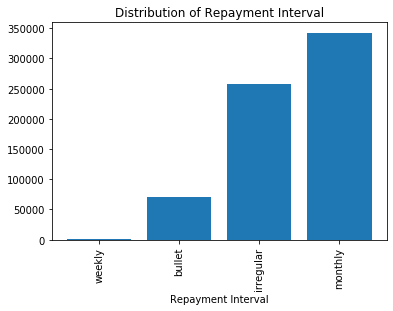

In [8]:
# Distribution of Repayment Interval
interval_count = df.groupby('repayment_interval')['id'].count().sort_values()
height = interval_count
labels = interval_count.index.tolist()
position = np.arange(1, 4+1, 1)

plt.bar(position, height)
plt.title('Distribution of Repayment Interval')
plt.xlabel('Repayment Interval')
plt.xticks(position, labels, rotation = 90);

A plurality of repayments are made monthly. The next most represented group makes irregular payments, meaning they are at least somewhat behind. Most of the rest make bullet payments, meaning they repay the entire loan at once, while a tiny group makes weekly payments. Further analysis indicates that all weekly payments were loans that were made in Kenya. There are also only 602 of them. Because this has extremely limited analytical value and these columns are a small percentage of loans made to people in Kenya, the rows containing them will be removed.

In [9]:
# Remove rows that have a value of 'weekly' in the repyment_interval column.
df = df.query('repayment_interval != "weekly"')

### Distribution of Loans by Country (Min. 1000)

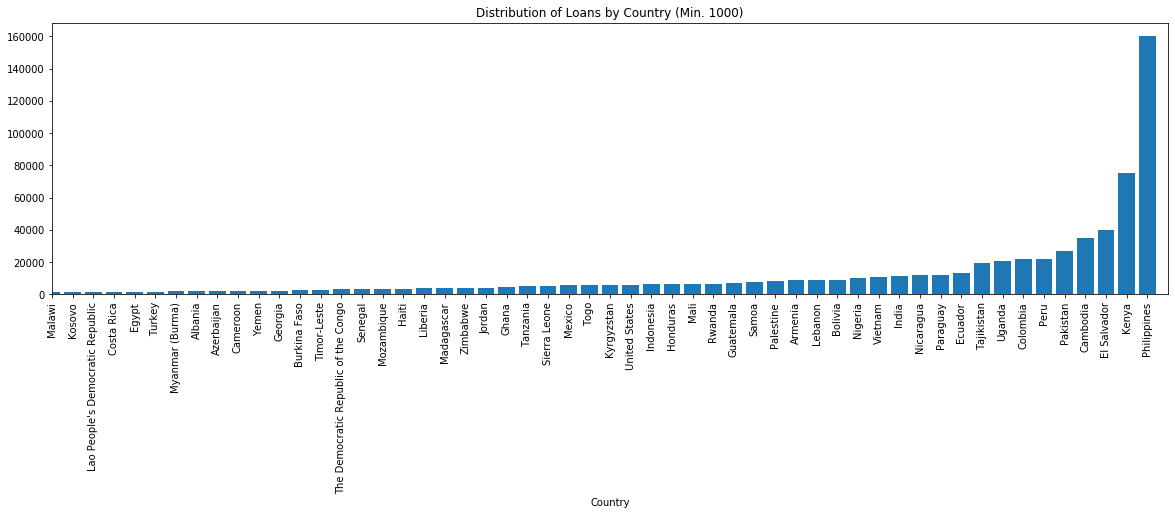

In [10]:
# Distribution of loans by country (min. 1000)
plt.figure(figsize = [20, 5])
country_count = df.groupby('country')['id'].count().sort_values()
height = country_count
labels = country_count.index.tolist()
position = np.arange(1, 87+1, 1)

plt.bar(position, height)
plt.title('Distribution of Loans by Country (Min. 1000)')
plt.xlabel('Country')
plt.xticks(position, labels, rotation = 90)
plt.xlim(left = 34, right = 87+1);

One thing that stands out with the distribution of loans by country is the geographic diversity. The top 5 countries are the Phillipines, Kenya, El Salvador, Cambodia, and Pakistan. These countries exist on 3 different continents.

### Disrtibution of Loan Amounts

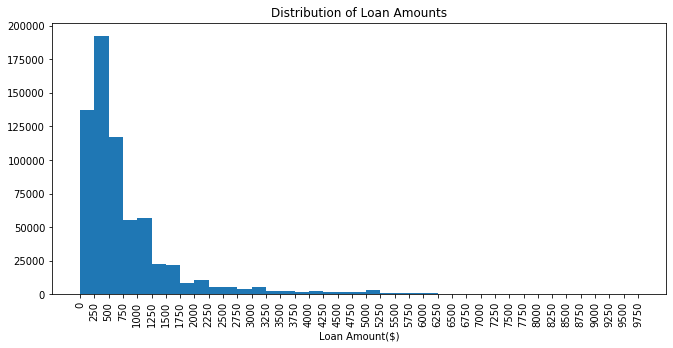

In [11]:
plt.figure(figsize = [11, 5])
bins = np.arange(0, 10000, 250)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'loan_amount', bins = bins)
plt.xticks(ticks, labels, rotation = 90)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount($)');

The majority of the loans are less than 750 dollars, peaking between 250 and 500 dollars. Since these loans are meant for people in some of the poorest parts of the world, this is not surprising. These money amounts can go a long way.

### Distribution of Loans by Sector

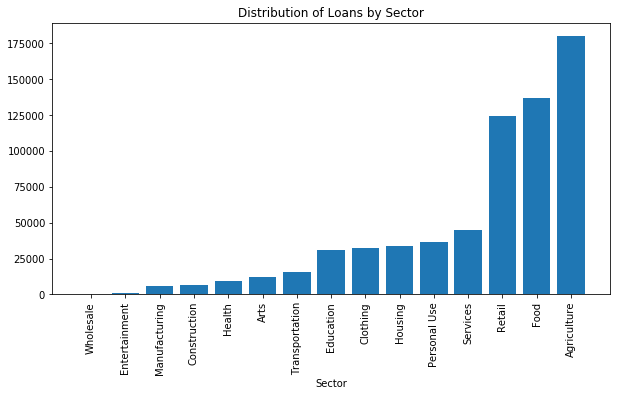

In [12]:
# Distribution of loans by country (min. 500)
plt.figure(figsize = [10, 5])
sector_count = df.groupby('sector')['id'].count().sort_values()
height = sector_count
labels = sector_count.index.tolist()
position = np.arange(1, 15+1, 1)

plt.bar(position, height)
plt.title('Distribution of Loans by Sector')
plt.xlabel('Sector')
plt.xticks(position, labels, rotation = 90);

The two most populat loans by sector are the production of food (agriculture) and the consumption of food. This makes sense, as poorer countries rely on these industries for economic and job growth, much like developed nations did before the industrial revolution.

### Distribution of Loan Terms (Months)

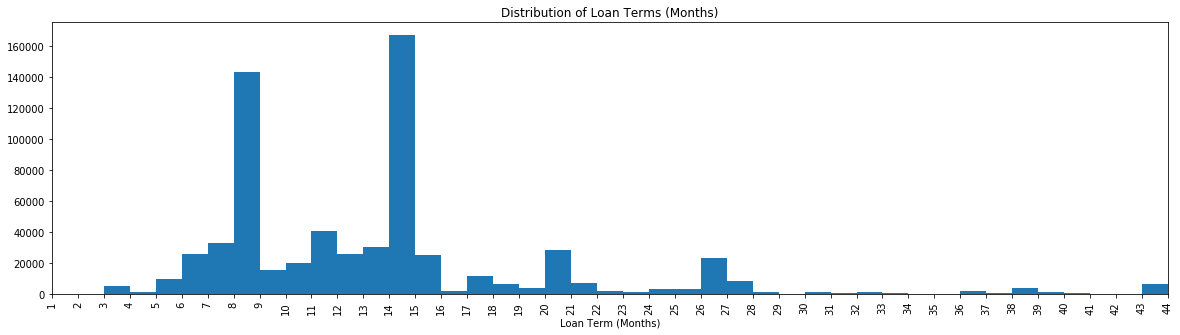

In [13]:
# Distribution of Loan Terms (Months)
plt.figure(figsize = [20, 5])
bins = np.arange(1, 148+1, 1)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'term_in_months', bins = bins)
plt.xticks(ticks, labels, rotation = 90)
plt.title('Distribution of Loan Terms (Months)')
plt.xlabel('Loan Term (Months)')
plt.xlim(left = 1, right = 44);

The majority of loan terms are less than 24 months. What is interesting about this distribution is that the peaks do not occur in nice round months like 6, 12, 18, 24 like one might expect. Instead, it peaks at 8 months, then again at 14.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? 

A plurality of repayments are made monthly. The next most represented group makes irregular payments, meaning they are at least somewhat behind. Most of the rest make bullet payments, meaning they repay the entire loan at once, while a tiny group makes weekly payments. One thing that stands out with the distribution of loans by country is the geographic diversity. The top 5 countries are the Phillipines, Kenya, El Salvador, Cambodia, and Pakistan. These countries exist on 3 different continents. 
The majority of the loans are less than 750 dollars, peaking between 250 and 500 dollars. Since these loans are meant for people in some of the poorest parts of the world, this is not surprising. These money amounts can go a long way.
The two most populat loans by sector are the production of food (agriculture) and the consumption of food. This makes sense, as poorer countries rely on these industries for economic and job growth, nuch like developed nations did before the industrial revolution. The majority of loan terms are less than 24 months. What is interesting about this distribution is that the peaks do not occur in nice round months like 6, 12, 18, 24 like one might expect. Instead, it peaks at 8 months, then again at 14.

## Bivariate Exploration

In [14]:
# Set base color for sb plots.
base_color = sb.color_palette()[0]

### Median Loan Amount Per Repayment Interval

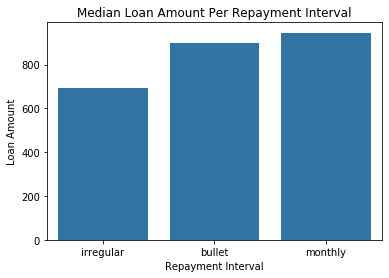

In [15]:
# Median Loan Amount Per Repayment Interval
loan_repay = sb.barplot(data = df, x = 'repayment_interval', y = 'loan_amount', ci = None, color = base_color)
loan_repay.set_title('Median Loan Amount Per Repayment Interval')
loan_repay.set_ylabel('Loan Amount')
loan_repay.set_xlabel('Repayment Interval');

The median loan amount for loans with monthly repayments is slightly higher than those with bullet repayments. The interesting thing here is the lower amount for people making irregular payments. It is possible that people more likely to miss payments qualify for less money.

### Repayment interval type by sector

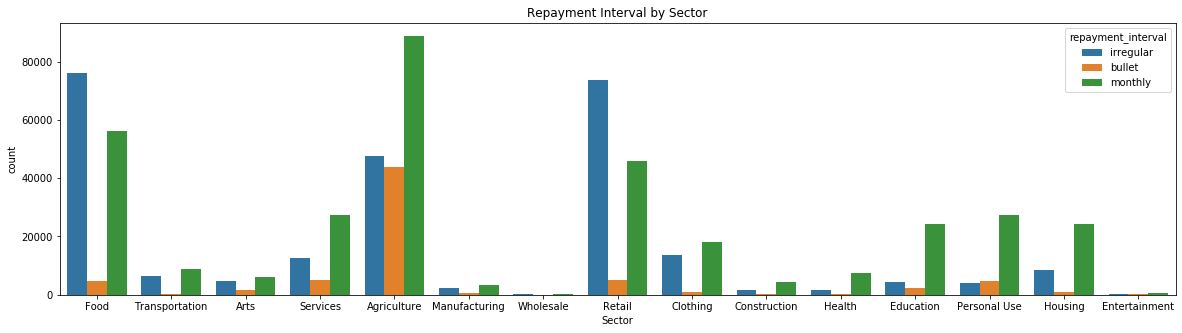

In [16]:
# Repayment interval type by sector
plt.figure(figsize = [20, 5])
sector_repay = sb.countplot(data = df, x = 'sector', hue = 'repayment_interval')
sector_repay.set_title('Repayment Interval by Sector')
sector_repay.set_xlabel('Sector');

When looking at the repayment rate divided by sector, food and retail have very elevated levels of irregular payments. On the other hand, health, education, personal use, and housing have lower levels.

### Loan term (months) by repayment interval

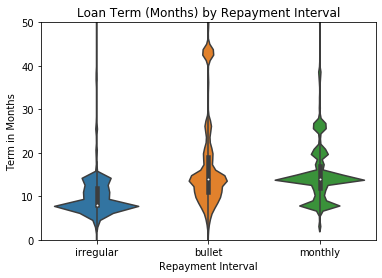

In [17]:
# Loan term (months) by repayment interval
repay_term = sb.violinplot(data = df, x = 'repayment_interval', y = 'term_in_months')
repay_term.set_xlabel('Repayment Interval')
repay_term.set_ylabel('Term in Months')
repay_term.set_title('Loan Term (Months) by Repayment Interval')
plt.ylim(0, 50);

Based solely on the graph of loan term by repayment interval, it would appear that, at least in developing countries, the advice of most financial gurus is wrong. Taking the longer term might be better for keeping up with payments. 

### Repayment interval by country Min (1000)

In [18]:
# list of countries sorted by number of loans
country_count = df.groupby('country')['id'].count().sort_values()
country_list = country_count.index.to_list()

In [19]:
# Lists of values that will be used in plot.
xlim = [(33, 42), (77, 86+1)]
ylim = [(0, 3000), (0, 150000)]
zoom = ['Bottom 10', 'Top 10']

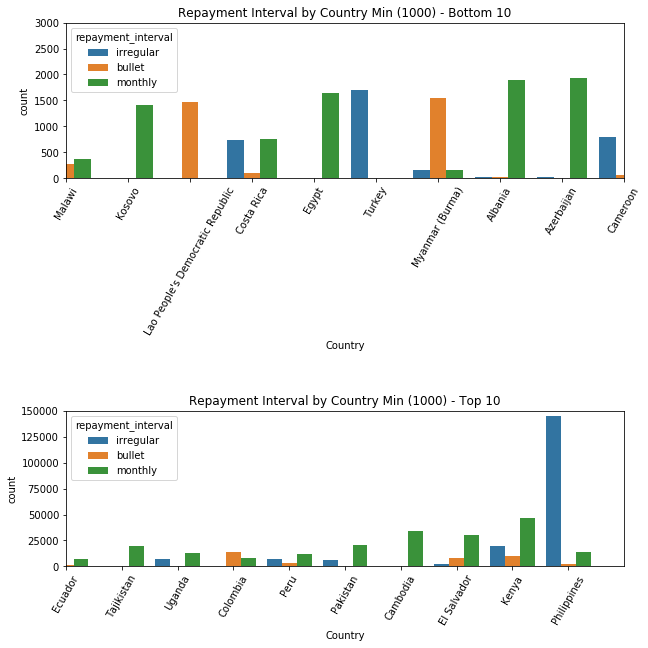

In [20]:
# Repayment interval by country Min (1000)
fig, ax = plt.subplots(nrows = 2, figsize = [10, 10])
plt.subplots_adjust(hspace = 1.5)
for i in range(len(xlim)):
    ax[i] = sb.countplot(data = df, x = 'country', hue = 'repayment_interval', order = country_list, ax = ax[i])
    ax[i].set_title('Repayment Interval by Country Min (1000) - {}'.format(zoom[i]))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=60)
    ax[i].set_xlabel('Country')
    ax[i].set_ylim(ylim[i][0], ylim[i][1])
    ax[i].set_xlim(xlim[i][0], xlim[i][1]);

Other than some countries in each group that have a very high amount of irregular payments (e.g. the Phillipines), there doesn't seem to be any differnce between countries with a lower amount of loans and those with higher amounts. I do not believe this warrants further study.

### Talk about some of the relationships you observed in this part of the investigation. 

The median loan amount for loans with monthly repayments is slightly higher than those with bullet repayments. The interesting thing here is the lower amount for people making irregular payments. It is possible that people more likely to miss payments qualify for less money. When looking at the repayment rate divided by sector, food and retail have very elevated levels of irregular payments. On the other hand, health, education, personal use, and housing have lower levels. Based solely on the graph of loan term by repayment interval, it would appear that, at least in developing countries, the advice of most financial gurus is wrong. Taking the longer term might be better for keeping up with payments. Other than some countries in each group that have a very high amount of irregular payments (e.g. the Phillipines), there doesn't seem to be any differnce between countries with a lower amount of loans and those with higher amounts. I do not believe this warrants further study.


## Multivariate Exploration

### Repayment Interval by Sector and Term in Months

In [21]:
#Lists of values that will be used in plot.
sector_list = df['sector'].unique().tolist()
sector_list_split = [sector_list[0:5], sector_list[5:10], sector_list[10:15]]
hue_order = df['repayment_interval'].unique()

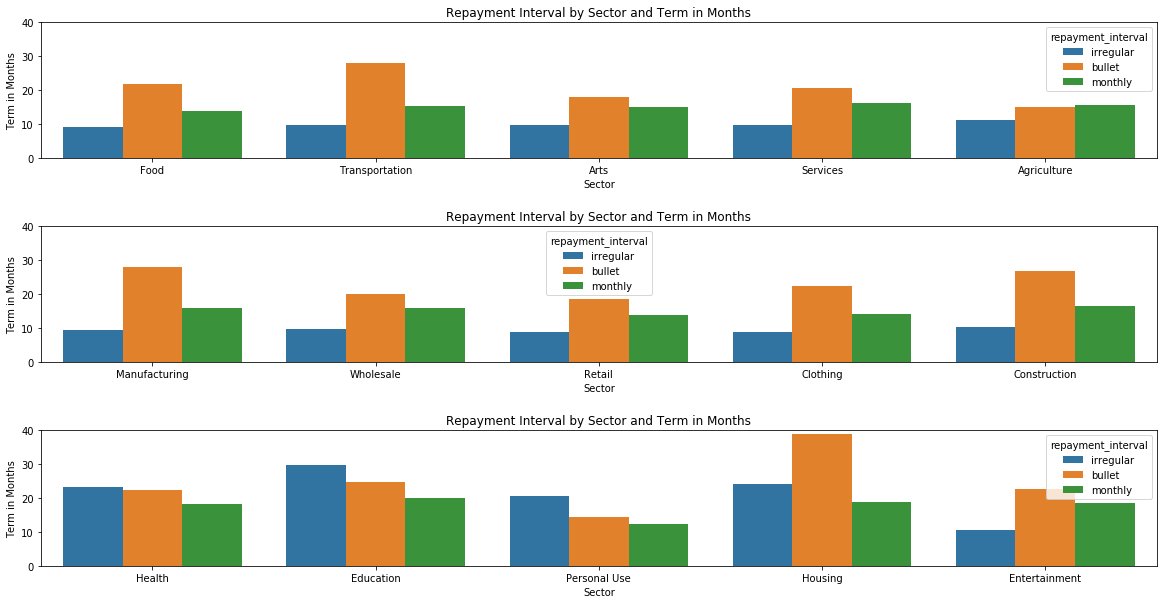

In [22]:
# Repayment interval by sector and term in months.
fig, ax = plt.subplots(nrows = 3, figsize = [20, 10])
plt.subplots_adjust(hspace = 0.5)
for i in range(len(sector_list_split)):
    ax[i] = sb.barplot(data = df[df['sector'].isin(sector_list_split[i])], x = 'sector', y = 'term_in_months', 
                       hue = 'repayment_interval', order = sector_list_split[i], hue_order = hue_order, ci = None, ax = ax[i])
    ax[i].set_title('Repayment Interval by Sector and Term in Months')
    ax[i].set_xlabel('Sector')
    ax[i].set_ylabel('Term in Months')
    ax[i].set_ylim(0, 40)

Borrowers in health, education, and personal use were of greater risk of missing payments at longer loan term lengths than those of the bullet and monthly repayment types. Lower risk sectors at longer loan term include food, transportation, services, and entertainment.

### Repayment Interval by Country and Term in Months

In [23]:
# Create list of countries that have more than 1000 loans and then query those countries into new df. 
country_count1000 = country_count.to_frame().query('id > 1000').index.to_list()
country1000_df = df[df['country'].isin(country_count1000)]
country_count1000_split = [country_count1000[0:11], country_count1000[11:22], country_count1000[22:33],
                           country_count1000[33:44], country_count1000[44:54]]
hue_order = df['repayment_interval'].unique()

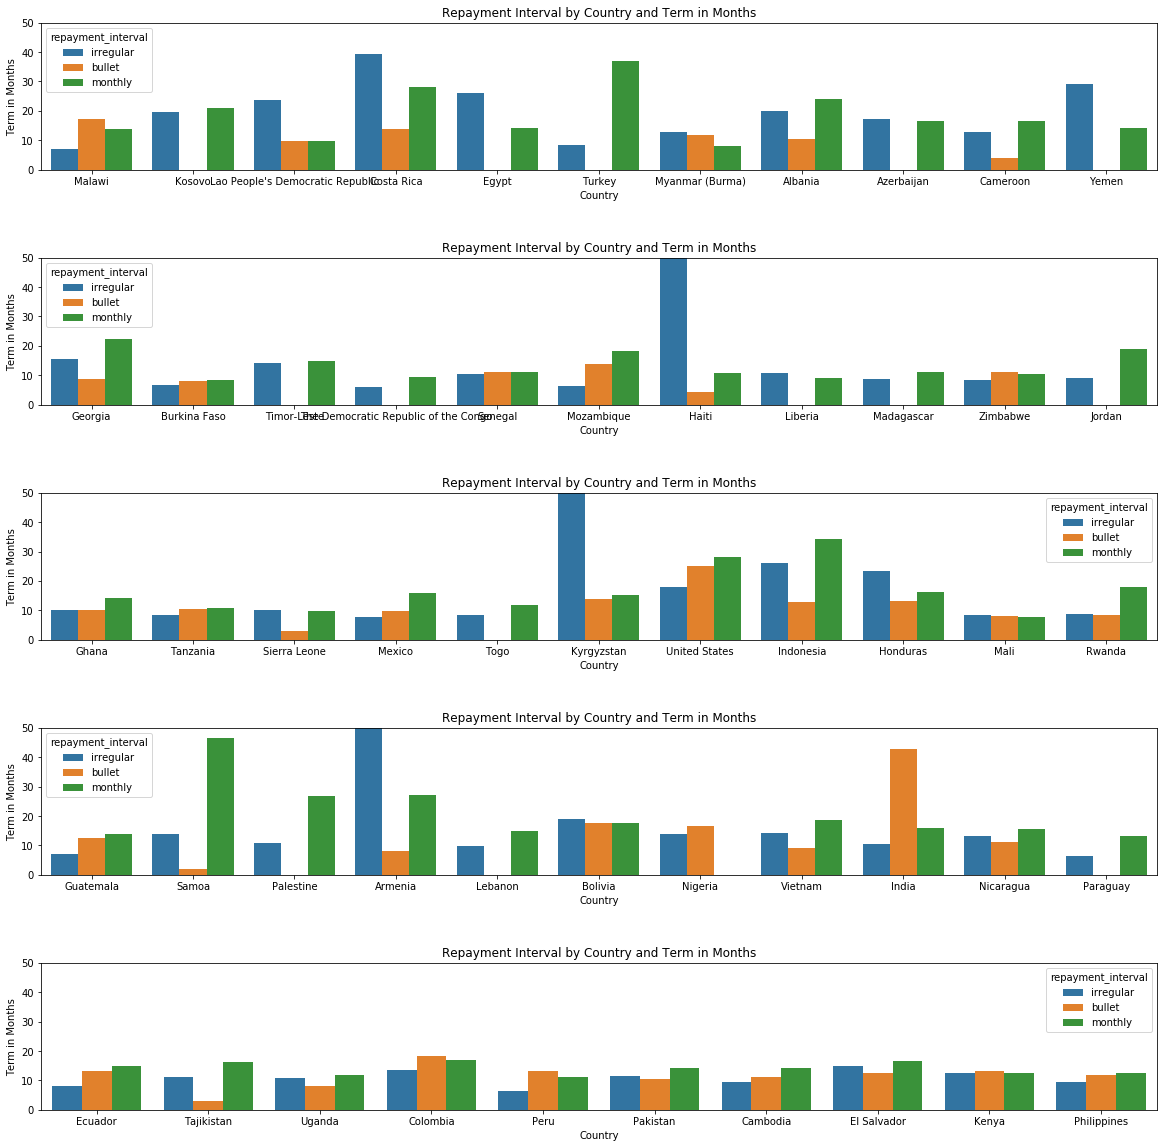

In [24]:
#Repayment Interval by Country and Term in Months
fig, ax = plt.subplots(nrows = 5, figsize = [20, 20])
plt.subplots_adjust(hspace = 0.6)
for i in range(len(country_count1000_split)):
    ax[i] = sb.barplot(data = df[df['country'].isin(country_count1000_split[i])], x = 'country', y = 'term_in_months', 
                       hue = 'repayment_interval', order = country_count1000_split[i], hue_order = hue_order, ci = None, ax = ax[i])
    ax[i].set_title('Repayment Interval by Country and Term in Months')
    ax[i].set_xlabel('Country')
    ax[i].set_ylabel('Term in Months')
    ax[i].set_ylim(0, 50)

Borrowers that are from the countries of Costa Rica, Lao People's Democratic Republic, Yemen, Haiti, Kyrgyzstan, and Armenia are at higher risk for missed payments at longer loan terms. People from the countries of Turkey, Mozambique, Jordan, Mexico, The United States, Rwanda, Samoa, Palestine, India, Ecuador, Colombia, Peru, Cambodia and the Phillipines are at lower risks at longer loan terms.

### Repayment Interval by Country and Loan Amount

In [25]:
# Create list of countries that have more than 1000 loans and then query those countries into new df.
country_count1000 = country_count.to_frame().query('id > 1000').index.to_list()
country1000_df = df[df['country'].isin(country_count1000)]
country_count1000_split = [country_count1000[0:11], country_count1000[11:22], country_count1000[22:33],
                           country_count1000[33:44], country_count1000[44:54]]
hue_order = df['repayment_interval'].unique()

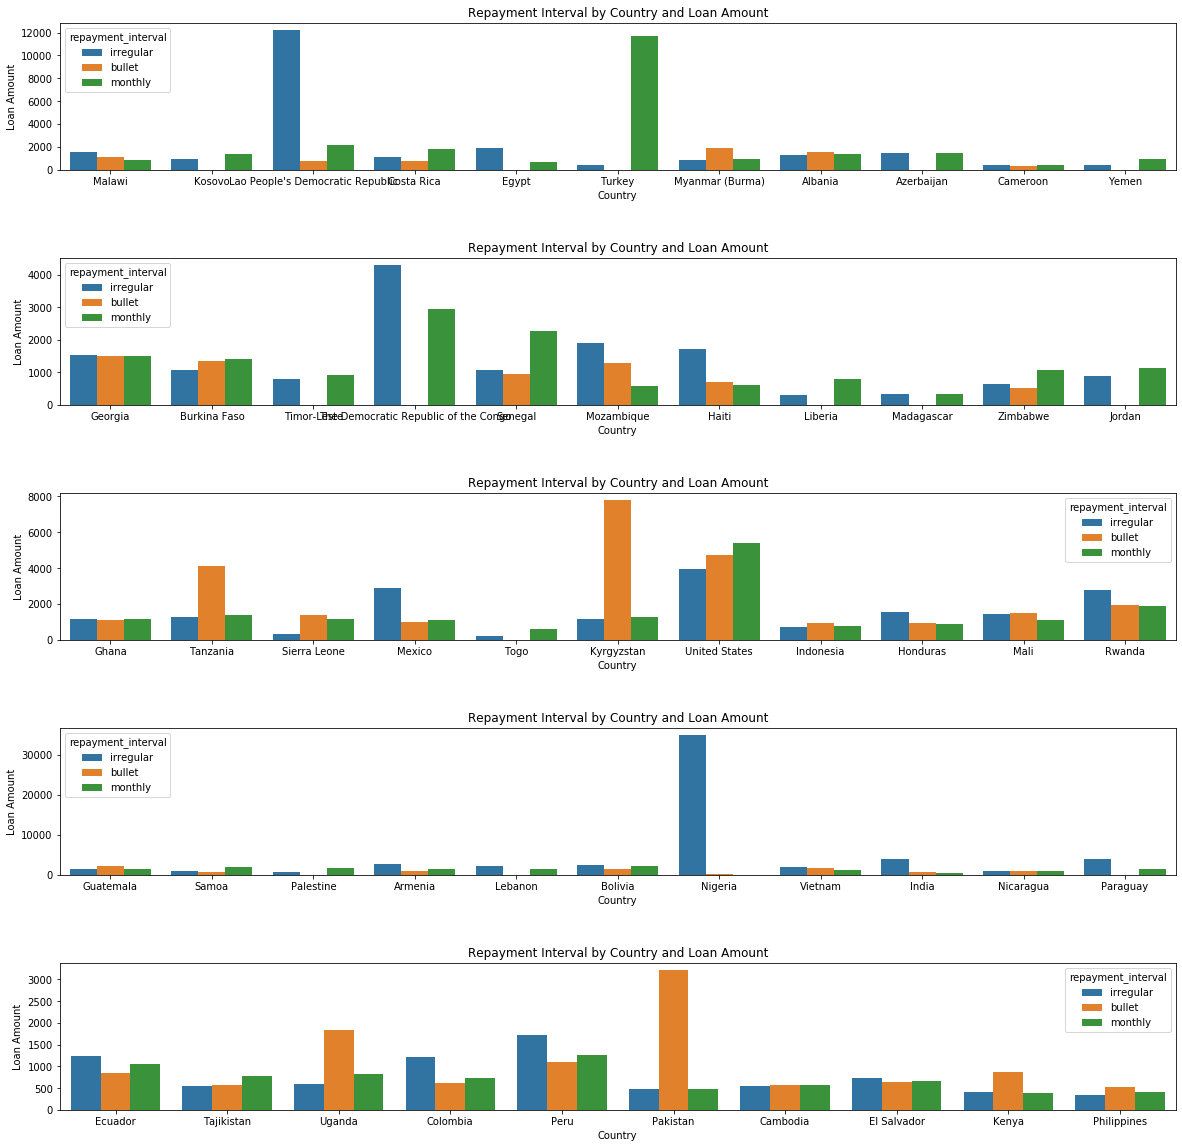

In [26]:
#Repayment Interval by Country and Loan Amount
fig, ax = plt.subplots(nrows = 5, figsize = [20, 20])
plt.subplots_adjust(hspace = 0.6)
for i in range(len(country_count1000_split)):
    ax[i] = sb.barplot(data = df[df['country'].isin(country_count1000_split[i])], x = 'country', y = 'loan_amount', 
                       hue = 'repayment_interval', order = country_count1000_split[i], hue_order = hue_order, ci = None, ax = ax[i])
    ax[i].set_title('Repayment Interval by Country and Loan Amount')
    ax[i].set_xlabel('Country')
    ax[i].set_ylabel('Loan Amount')

Borrowers from The Lao People's Democratic Republic, Mexico, and Nigeria are at an especially high risk of missing payments at higher loan amounts. On the other hand, the countries of Turkey, Tanzania, Sierra Leone, Kyrgyzstan, the United States, Uganda, Pakistan, Kenya, and the Phillipines are at lower risks with higher loan amounts.

In [27]:
#Lists of values that will be used in plot.
sector_list = df['sector'].unique().tolist()
sector_list_split = [sector_list[0:5], sector_list[5:10], sector_list[10:15]]
hue_order = df['repayment_interval'].unique()

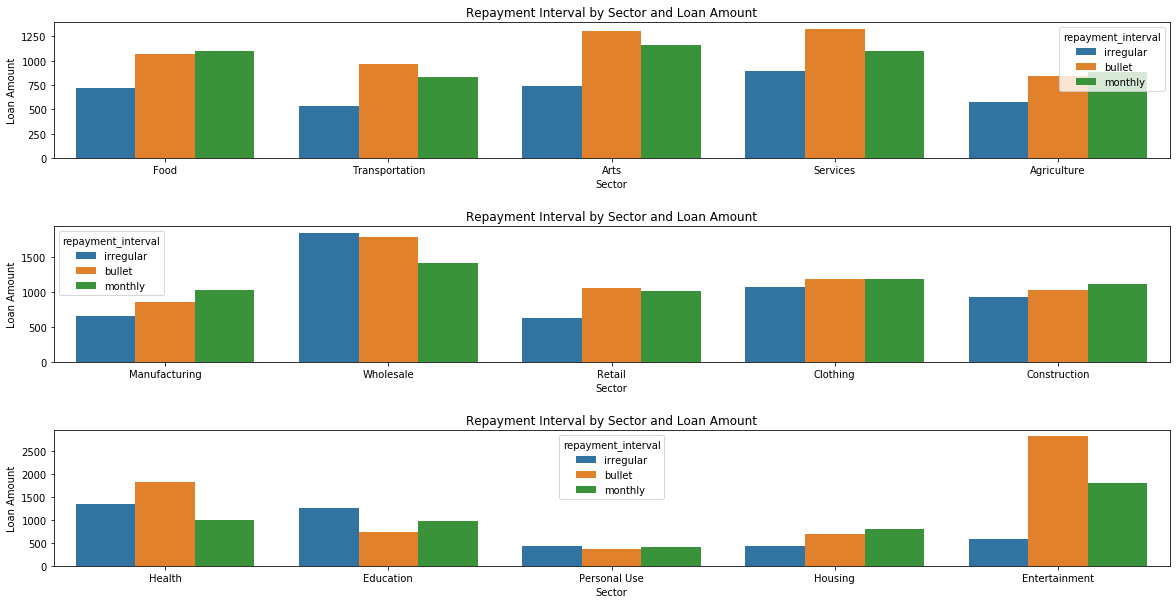

In [29]:
fig, ax = plt.subplots(nrows = 3, figsize = [20, 10])
plt.subplots_adjust(hspace = 0.5)
for i in range(len(sector_list_split)):
    ax[i] = sb.barplot(data = df[df['sector'].isin(sector_list_split[i])], x = 'sector', y = 'loan_amount', 
                       hue = 'repayment_interval', order = sector_list_split[i], hue_order = hue_order, ci = None, ax = ax[i])
    ax[i].set_title('Repayment Interval by Sector and Loan Amount')
    ax[i].set_xlabel('Sector')
    ax[i].set_ylabel('Loan Amount')

Borrowers who need the money for wholesale, education, and persnonal use are at a higher risk for missed payments at higher loan amounts. Risks for all other sectors at high amounts range from slightly lower to significantly lower.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!